# **Classification using Support Machine Vector Algorithm**

# Importing Libraries and Datasets

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
data = load_wine()
X = data.data  # Features
y = data.target  # Labels
feature_names = data.feature_names
class_names = data.target_names

In [32]:
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

In [33]:
print("Dataset Overview:")
df.head()

Dataset Overview:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [34]:
print("\nClass Distribution:")
df['Target'].value_counts()


Class Distribution:


Target
1    71
0    59
2    48
Name: count, dtype: int64

# Deploying the Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [38]:
y_pred = model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy * 100:.2f} %')
print('\nClassification Report:\n', classification_report(y_test, y_pred, target_names=class_names))


Model Accuracy: 98.15 %

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# Plotting the Dataset

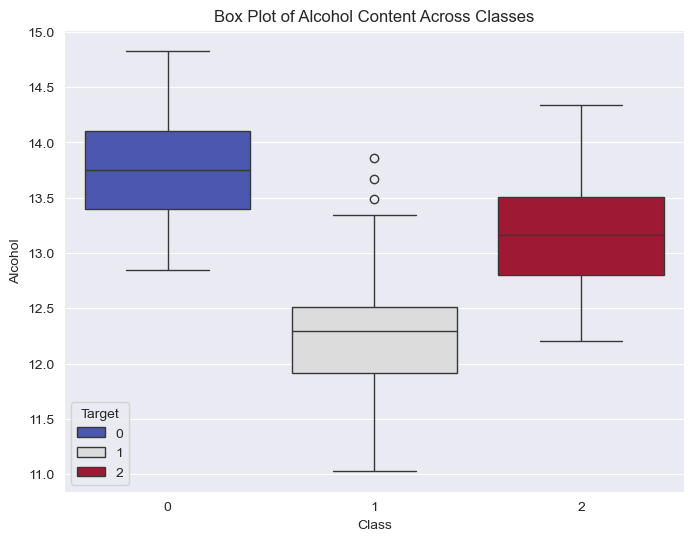

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Target'], y=df['alcohol'], palette='coolwarm',hue=df['Target'] )
plt.xlabel('Class')
plt.ylabel('Alcohol')
plt.title('Box Plot of Alcohol Content Across Classes')
plt.show()

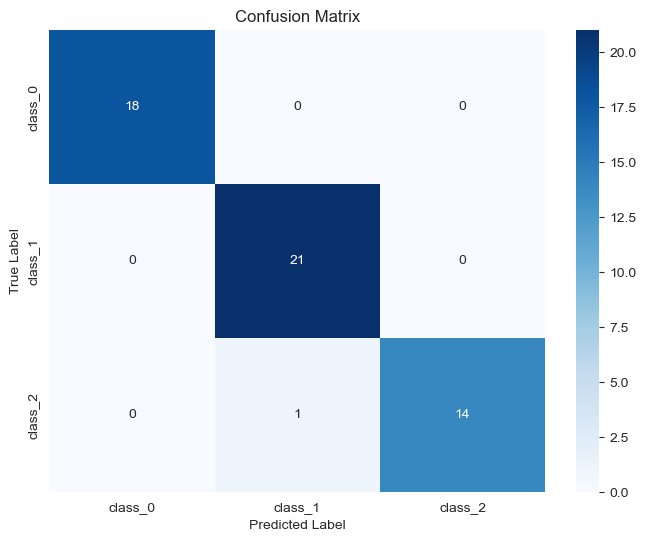

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Feature importance visualization

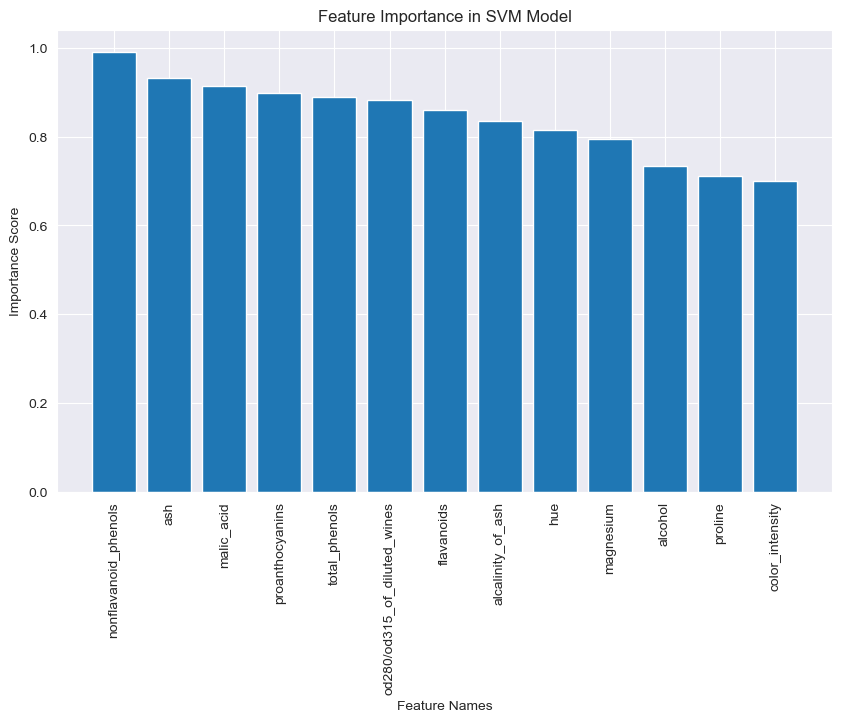

In [42]:
plt.figure(figsize=(10, 6))
coef = np.abs(model.support_vectors_).mean(axis=0)
indices = np.argsort(coef)[::-1]
plt.bar(range(len(feature_names)), coef[indices], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Importance Score')
plt.title('Feature Importance in SVM Model')
plt.show()